# Relating the span of subjects to the articles authors


Author(s) - Mike Talbot  
Date Created - 17/12/18  
Date Last Modified - 17/12/18  
GitRepo - [LINK](https://github.com/miketalbotbox/MDM_Interdisciplinarity "Super GitHub Repo Yay!")


UTILITY:
This process has three main stages, the first is to pull the list of authors from the articles.
Then compare the Articles authors to the list of authors in the authors csv.
Finally see what subjects are studied by each author
Calculate a spread of subjects using the heat map weighting previously calculated :)

In [1]:
"""
Cool fresh imports all the way from the internets to make the magic happen!
"""
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from SubjectSearch import CreateGraph, FindPerson, TotalSubjects
from SubjectWeights import CreateWeights

In [2]:
"""
Bringing in the csv files required
"""

ArticleCSV = pandas.read_csv("articles.csv")
AuthorsCSV = pandas.read_csv("authors.csv")

In [3]:
"""
Separating out the main headings required
"""

Article_Authors = ArticleCSV["Author(s) ID"]
Article_Authors = Article_Authors[0:4000]
Authors_ID_Num = AuthorsCSV["Auth-ID"]
Authors_Subject = AuthorsCSV["Subject Area"]
#Authors_Subject.head()

In [4]:
"""
Handling the Article_Authors List to be a list of lists containing
the authors rather than a list containing a single string with all the 
authors within it

Addendum:
List items are converted into an int, as then comparisons between int
and int will be far quicker and damn we have a lot of data to compare!
"""
#print(len(Article_Authors.index))
List_of_Strings = [0]*(len(Article_Authors.index))
#print(List_of_Strings)

i = 0
for Long_String in Article_Authors:
    List_of_Strings[i] = Long_String.split(';')
    if '' in List_of_Strings[i]:
        List_of_Strings[i].remove('')
    for String in List_of_Strings[i]: ### Loop to make 
        Integer = int(String)
        Const = List_of_Strings[i]
        Const[Const.index(String)] = Integer
    i += 1
    """if i%100 == 0:
        print(i)"""
#print(type(List_of_Strings[0][0]))
List_of_IDs = List_of_Strings ## Nicer Name

In [17]:
"""
Creating the graph to allow using the connections as a search engine
(Used in the Authors_Connectivity_Matrix.ipynb file but made into a
function)
"""

Authors_Subject_List = []
subjects = Authors_Subject.tolist()
subjects = [str(line) for line in subjects]
Authors_Subjects_List = [subject.split('\n') for subject in subjects]
for x in Authors_Subjects_List:
    if '' in x:
        x.remove('') 
        
Total_Subjects = TotalSubjects(Authors_Subjects_List) 
Total_Subjects.remove('nan')
ASGraph = CreateGraph(Authors_ID_Num,Authors_Subjects_List, Total_Subjects)

In [18]:
"""
Going through the list of Authors (List_of_IDs) and comparing them with 
the authors from the authors list!

Output:
A nested list, the first index refers to the articles number and for each
the subjects studied are listed 

Addendum:
Created a file where I can now create an author-subject graph and then 
use that as a search engine of sorts (Using the above box)
"""

Known_Subjects_Article_Final = []

for Authors_per_Article in List_of_IDs:
    List_Of_Known_Authors = []
    List_Of_The_Unknown = []
    Known_Subjects_Article = []
    for Each_ID in Authors_per_Article:
        if Each_ID in Authors_ID_Num.values:
            List_Of_Known_Authors.append(Each_ID)
            #print(Each_ID)
        else:
            List_Of_The_Unknown.append(Each_ID)
            #print('Sorry, this person isnt on file!')
    #print(List_Of_Known_Authors)
    for Known_Person in List_Of_Known_Authors:
        Known_Subjects_Author = FindPerson(ASGraph,Known_Person)
        Known_Subjects_Article = Known_Subjects_Article + [*Known_Subjects_Author]
    if 'nan' in Known_Subjects_Article:
        Known_Subjects_Article.remove('nan')
    Known_Subjects_Article_Final.append(Known_Subjects_Article)          
        #continue
#print(Known_Subjects_Article_Final)   

In [7]:
"""
Initialise connectivities of subjects (Using the heatmap approach from before)
"""

Sub_Vs_Sub = CreateWeights(Authors_Subjects_List, Total_Subjects)

In [44]:
"""
Loop through the articles
In each article loop through each subject
For each subject calculate a "Similarity value"
Find the biggest value
This is designated as the articles discipline


This is slightly redone in order to measure the "strength"
of each subject in each report. The strongest subject is the
main discilpine of the report and then a varience will be calculated
to see how interdisciplinary the writers of the report are
"""
strength = []
Strengths = []
#print(len(Total_Subjects))

for article in Known_Subjects_Article_Final:
    weight = 0
    Weights = np.zeros(len(Total_Subjects))
    for topic in Total_Subjects:
        if topic in article:
            Comp1 = Total_Subjects.index(topic)
            for subject in article:
                try:
                    Comp2 = Total_Subjects.index(subject)
                    weight += Sub_Vs_Sub[Comp1,Comp2]
                    Weights[Total_Subjects.index(topic)] += Sub_Vs_Sub[Comp1,Comp2]
                except:
                    print('theres a nan but deal with later')
            weight /= len(article)
            Weights /= len(article)**(0.5)
    strength.append(weight)
    Strengths.append(Weights)
    
#print(Strengths[0:10])


theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later
theres a nan but deal with later


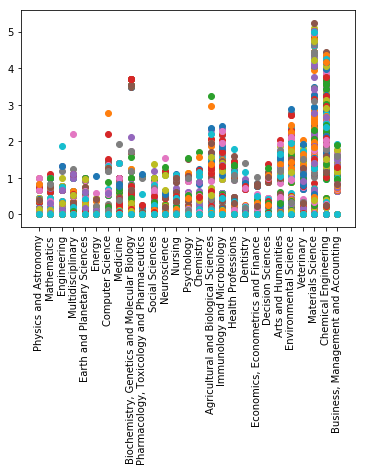

In [48]:
"""
A metric to measure the spread  per author and then compare the spreads of authors in each article
mean/variance

look into aspects in both authors and articles.
"""

"""
Plotting the strengths of subjects
"""
for n in range(len(Strengths)):
    plt.scatter(Total_Subjects,Strengths[n])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.show()
#plt.plot(strength)
#plt.show()

In [69]:
"""
Searching for the dominant subject in an article and storing in a list
"""
Num_Art = len(Strengths)
Top_Subject = []
Top_Subject_Index = []
Strengths = np.array(Strengths)
for n in range(Num_Art):
    MaxIndex = np.unravel_index(np.argmax(Strengths[n]),Strengths.shape)
    #print(Total_Subjects[MaxIndex[1]])
    Top_Subject_Index.append(MaxIndex[1])
    Top_Subject.append(Total_Subjects[MaxIndex[1]])

#print(Top_Subject[0:30])
    

In [79]:
"""
Calculating the varience of the data
"""
Difference_List_Total = []
Variation = []
for article in Known_Subjects_Article_Final:
    Topic = Top_Subject_Index[Known_Subjects_Article_Final.index(article)]
    Difference_List = []
    for subject in article:
        try:
            Comp = Total_Subjects.index(subject)
            Difference_List.append(Sub_Vs_Sub[Topic,Comp])
        except:
            print("Still nan's.", end=' ')
    if Difference_List != []:
        Var = np.var(Difference_List)
    else:
        Var = 0 # avoids getting NaN from having an empty set
    Difference_List_Total.append(Difference_List)
    Variation.append(Var)

#print(Variation)

Still nan's. Still nan's. 

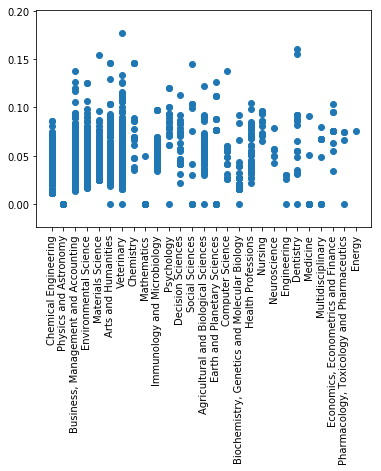

In [80]:
"""
Plotting the variance to see if there is a pattern, no there isnt
"""
plt.scatter(Top_Subject,Variation)
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.show()
